In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import sklearn
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [72]:
#reading data files
store=pd.read_csv("store.csv")
train=pd.read_csv("train.csv",parse_dates = True, index_col = 'Date')

In [73]:
store.head().append(store.tail())

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [74]:
train.head().append(train.tail())

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1
2013-01-01,1114,2,0,0,0,0,a,1


## Dealing with missing values

In [75]:
#Count missing values in store dataset
print("Store Dataset:\n\n",store.isnull().sum())

Store Dataset:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [76]:
#Count missing values in train dataset
print("Train Dataset:\n\n",train.isnull().sum())

Train Dataset:

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [77]:
#we can see that some features have a high percentage of missing values and they won't be accurate as indicators, 
#so we will remove features with more than 30% missing values.
store = store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

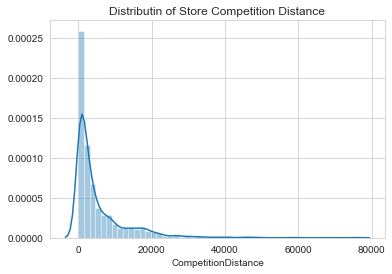

In [78]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

## The distribution is right skewed, so we'll replace missing values with the median.

In [79]:
# replace missing values in CompetitionDistance with median for the store dataset
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

## Data Extraction

In [80]:
# extract year, month, day and week of year from "Date"
train["Year"]=train.index.year
train["Month"]=train.index.month
train["Day"]=train.index.day
train["WeekOfYear"]=train.index.week
train = train.reset_index()

In [81]:
train

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2013-01-01,1111,2,0,0,0,0,a,1,2013,1,1,1
1017205,2013-01-01,1112,2,0,0,0,0,a,1,2013,1,1,1
1017206,2013-01-01,1113,2,0,0,0,0,a,1,2013,1,1,1
1017207,2013-01-01,1114,2,0,0,0,0,a,1,2013,1,1,1


## Join tables 

In [82]:
df = pd.merge(train, store, how='left', on='Store')
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [83]:
len(df)

1017209

## Drop subsets of data which might cause Bias

In [84]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
df = df[df.Open != 0]

In [85]:
# Open isn't a variable anymore, so we'll drop it
df = df.drop('Open', axis=1)

In [86]:
# see if there's any opened store with zero sales
print("Number of stores with zero sales:",df[df.Sales == 0].shape[0])

Number of stores with zero sales: 54


In [87]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [88]:
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,0


## Handling Categorical Data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Date                 844338 non-null  datetime64[ns]
 1   Store                844338 non-null  int64         
 2   DayOfWeek            844338 non-null  int64         
 3   Sales                844338 non-null  int64         
 4   Customers            844338 non-null  int64         
 5   Promo                844338 non-null  int64         
 6   StateHoliday         844338 non-null  object        
 7   SchoolHoliday        844338 non-null  int64         
 8   Year                 844338 non-null  int64         
 9   Month                844338 non-null  int64         
 10  Day                  844338 non-null  int64         
 11  WeekOfYear           844338 non-null  int64         
 12  StoreType            844338 non-null  object        
 13  Assortment   

In [90]:
# see what's in nominal varibles 
set(df.StateHoliday), set(df.StoreType), set(df.Assortment)

({0, '0', 'a', 'b', 'c'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [91]:
# StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# convert number 0 to string 0
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [92]:
set(df.StateHoliday)

{'0', 'a', 'b', 'c'}

In [93]:
# 0 - not a state holiday; 1- is on a state holiday
df['StateHoliday'] = df.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [94]:
set(df.StateHoliday)

{0, 1}

## Adding additional features

In [95]:
df1 = df.copy()

In [96]:
# calculate weekly average sales
sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [97]:
sales.head()

,Year,Month,Store,AvgSales
0,2013,1,1,4939.653846
1,2013,1,2,4429.653846
2,2013,1,3,6371.269231
3,2013,1,4,9027.423077
4,2013,1,5,4209.307692


In [98]:
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [99]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)
# merge
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))

In [100]:
#create a variable that calculates Monthly average number of customers for each store.
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [101]:
df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [102]:
# drop original feature Customers
df1 = df1.drop('Customers', axis=1)

In [103]:
# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [104]:
# merge
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

In [105]:
# drop extra columns
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)

In [106]:
df1.head()

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,AvgSales,AvgCustomer
0,5,5263,1,0,1,2015,7,31,31,c,a,1270.0,0,4491.333333,519.407407
1,5,6064,1,0,1,2015,7,31,31,a,a,570.0,1,4954.259259,621.222222
2,5,8314,1,0,1,2015,7,31,31,a,a,14130.0,1,6797.592593,682.888889
3,5,13995,1,0,1,2015,7,31,31,c,c,620.0,0,10256.851852,1294.259259
4,5,4822,1,0,1,2015,7,31,31,a,a,29910.0,0,4599.629630,521.703704


## Exploratory data analysis 

In [43]:
dfv = df.copy()

# Sales Distribution

In [404]:
{"Mean":np.mean(dfv.Sales),"Median":np.median(dfv.Sales)}

{'Mean': 6955.959133664481, 'Median': 6369.0}

Text(0.5, 1.0, 'Sales Distribution')

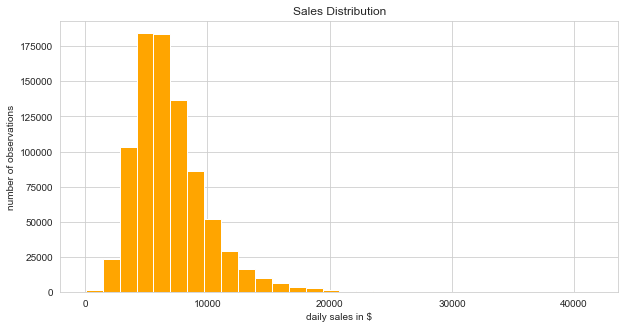

In [405]:
plt.figure(figsize=(10,5))
plt.hist(x=dfv.Sales, bins=30,color = "orange")
plt.ylabel('number of observations')
plt.xlabel('daily sales in $')
plt.title('Sales Distribution')

# Customer Distribution

In [406]:
{"Mean":np.mean(dfv.Customers),"Median":np.median(dfv.Customers)}

{'Mean': 762.777166253325, 'Median': 676.0}

Text(0.5, 1.0, 'Customer Distribution')

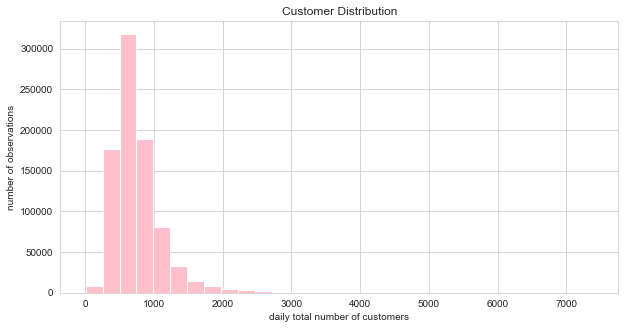

In [407]:
plt.figure(figsize=(10,5))
plt.hist(x=dfv.Customers , bins=30,color = "pink")
plt.ylabel('number of observations')
plt.xlabel('daily total number of customers')
plt.title('Customer Distribution')

# Sales Over Time

In [408]:
store1_2015 = dfv.query('Store == 1 and Year == 2015')
store1_2013 = dfv.query('Store == 1 and Year == 2013')
store1_2014 = dfv.query('Store == 1 and Year == 2014')

Text(0.5, 1.0, 'Sales Over Time')

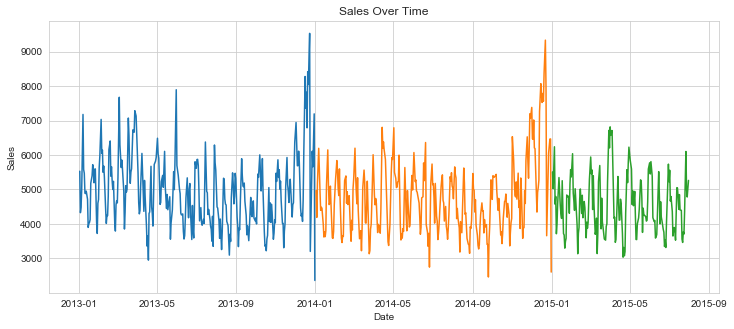

In [409]:
plt.figure(figsize=(12,5))
sns.lineplot(x=store1_2013.Date, y=store1_2013.Sales, data=store1_2013)
sns.lineplot(x=store1_2014.Date, y=store1_2014.Sales, data=store1_2014)
sns.lineplot(x=store1_2015.Date, y=store1_2015.Sales, data=store1_2015)
plt.title('Sales Over Time')

# Sales Over Weeks

Text(0.5, 1.0, 'Sales Over Weeks')

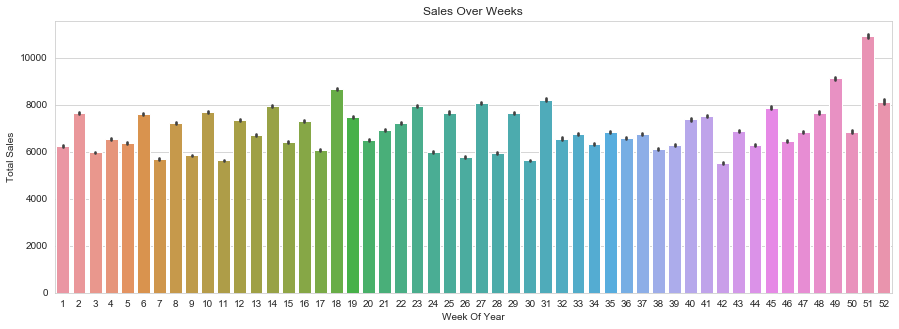

In [516]:
plt.figure(figsize=(15,5))
sns.barplot(x=dfv['WeekOfYear'],y=dfv['Sales'],data=dfv)
plt.xlabel('Week Of Year')
plt.ylabel('Total Sales')
plt.title('Sales Over Weeks')

# Sales By Store Type

Text(0.5, 1.0, 'Sales By Store Type')

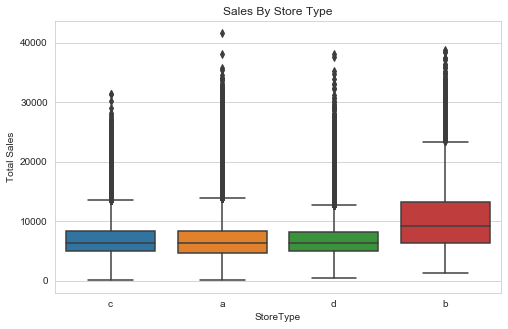

In [413]:
# StoreType - differentiates between 4 different store models: a, b, c, d
plt.figure(figsize=(8,5))
sns.boxplot(x=dfv.StoreType, y=dfv.Sales, data=dfv)
plt.ylabel('Total Sales')
plt.title('Sales By Store Type')

# Sales By Assortment

Text(0.5, 1.0, 'Sales By Assortment')

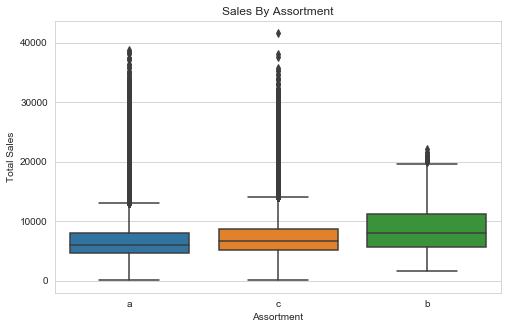

In [48]:
plt.figure(figsize=(8,5)) 
sns.boxplot(x=dfv.Assortment, y=dfv.Sales, data=dfv) 
plt.ylabel('Total Sales') 
plt.title('Sales By Assortment')

# Assortment-wise sales over months with respect to store type.

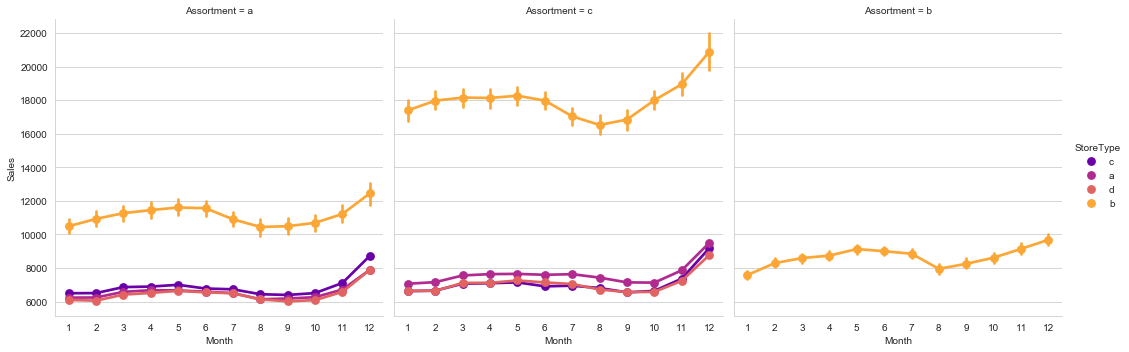

In [415]:
sns.factorplot(data = dfv, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               hue = 'StoreType')

# Sales vs. Competition Distance

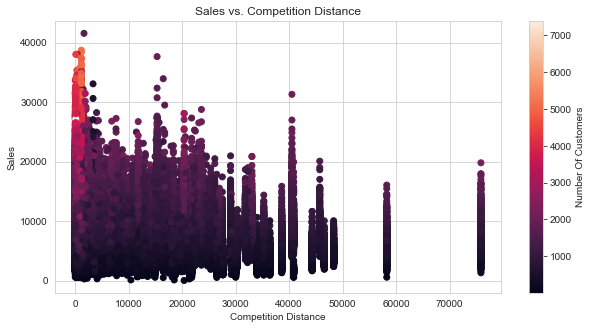

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(x=dfv.CompetitionDistance, y=dfv.Sales , c=dfv.Customers)
plt.ylabel('Sales')
plt.xlabel('Competition Distance')
plt.title('Sales vs. Competition Distance')
cbr= plt.colorbar()
cbr.set_label('Number Of Customers')

# Impact of promotion on sales over days of a week

In [418]:
print ("Number of Stores opened on Sundays:{}" .format(dfv[dfv.DayOfWeek == 7]['Store'].unique().shape[0]))

Number of Stores opened on Sundays:33


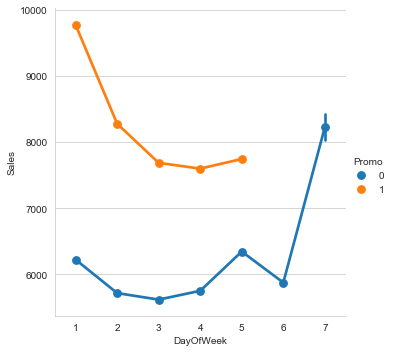

In [419]:
sns.factorplot(data = dfv, x ="DayOfWeek", y = "Sales",
                hue='Promo'
               
              ,sharex=False)

## Correlation HeatMap

In [420]:
# Converting categorial features Assortment and StoreType  
dfv['Assortment']=dfv['Assortment'].astype('category').cat.codes
dfv['StoreType']=dfv['StoreType'].astype('category').cat.codes

# Adding new feature SalesperCustomer to get better correlation with StoreType and Assortment
dfv['SalesperCustomer']=dfv['Sales']/dfv['Customers']

In [421]:
corr = dfv.corr()

Text(0.5, 1, 'Correlation Heatmap')

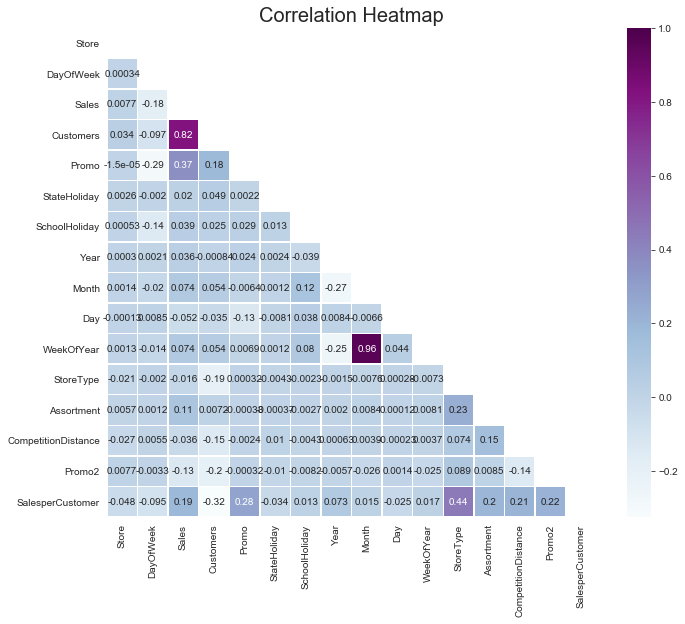

In [422]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask, annot= True,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

## Store Sales Prediction

In [50]:
# split features and labels
X = df1.drop('Sales', axis=1)
y = df1.Sales

In [51]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [52]:
xd.head()

,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,AvgSales,AvgCustomer,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,1,0,1,2015,7,31,31,1270.0,0,4491.333333,519.407407,0,0,1,0,1,0,0
1,5,1,0,1,2015,7,31,31,570.0,1,4954.259259,621.222222,1,0,0,0,1,0,0
2,5,1,0,1,2015,7,31,31,14130.0,1,6797.592593,682.888889,1,0,0,0,1,0,0
3,5,1,0,1,2015,7,31,31,620.0,0,10256.851852,1294.259259,0,0,1,0,0,0,1
4,5,1,0,1,2015,7,31,31,29910.0,0,4599.629630,521.703704,1,0,0,0,1,0,0


In [53]:
# split training and test datasets
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [66]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100 

# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

regression_train = linreg.score(xd_train, yd_train)
regression_test = linreg.score(xd_test, yd_test)

Regresion Model Score : 0.7486872962950808 , Out of Sample Test Score : 0.7482884273948014
Training RMSE : 1552.8927784361235 Testing RMSE : 1556.03272570329
Training MAPE : 16.996208120523935 Testing MAPE : 17.053657649223258


## Random Forest Regression

In [55]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [56]:
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

In [57]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [ ]:
#There are multiple features present in the dataset
#This DataFrame will help us to obtain the importance of each features.

feature_importances = pd.DataFrame(rdf.feature_importances_,
                                   index = xl_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances

In [67]:
print("Regresion Model Score" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Forest_train = rdfreg.score(xl_train, yl_train)
Forest_test = rdfreg.score(xl_test, yl_test)

Regresion Model Score : 0.987846640271652 , Out of Sample Test Score : 0.919540086013927
Training RMSE : 341.49348723935424 Testing RMSE : 879.7452225985778
Training MAPE : 3.4135825266039324 Testing MAPE : 9.018590458083315


# K-Nearest Neighbours Regression

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [68]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Knn_train = knnreg.score(xd_train, yd_train)
Knn_test =  knnreg.score(xd_test, yd_test)

Regresion Model Score : 0.6524756271336151 , Out of Sample Test Score : 0.6276810088437411
Training RMSE : 1826.1097834629309 Testing RMSE : 1892.451376032131
Training MAPE : 21.949007513402734 Testing MAPE : 22.78498743408952


In [64]:
for x in range(1,30):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

Regresion Model Score : 1.0 , Out of Sample Test Score : 0.6713355460740096
Regresion Model Score : 0.9174382077256099 , Out of Sample Test Score : 0.7028982767164882
Regresion Model Score : 0.8674079040730914 , Out of Sample Test Score : 0.6882273118515285
Regresion Model Score : 0.8237553183676828 , Out of Sample Test Score : 0.6622603886847955
Regresion Model Score : 0.7831555142797049 , Out of Sample Test Score : 0.6380455436468406
Regresion Model Score : 0.7479327384709074 , Out of Sample Test Score : 0.6209075764677412
Regresion Model Score : 0.7207553684123154 , Out of Sample Test Score : 0.609514759500425
Regresion Model Score : 0.7003407202710207 , Out of Sample Test Score : 0.6021167949934485
Regresion Model Score : 0.684490153400208 , Out of Sample Test Score : 0.5973257493711543
Regresion Model Score : 0.6729819312035159 , Out of Sample Test Score : 0.5957241805089737
Regresion Model Score : 0.6653044886979489 , Out of Sample Test Score : 0.5970751625091903
Regresion Model 

# Comparison between models

In [69]:
#Accuracy Score Comparison between Linear Regression, Random Forest and KNN

import pandas as pd

train_error=[regression_train,Forest_train,Knn_train]

test_error=[regression_test,Forest_test,Knn_test]

col={'Train Error':train_error,'Test Error':test_error}
models=['Linear Regression','RDF','Knn']
dfm=pd.DataFrame(data=col,index=models)
dfm

,Train Error,Test Error
Linear Regression,0.748687,0.748288
RDF,0.987847,0.919540
Knn,0.652476,0.627681


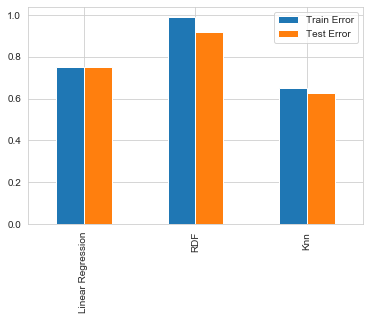

In [70]:
#PLotting the table into a graph using Bar Plot
dfm.plot(kind='bar')